In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_Txt,Job State,Same State,Age,Python_yn,R_yn,Spark_yn,Aws_yn,Excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,51.0,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,40.0,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,...,85.0,KnowBe4\r\n,FL,1,14.0,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,...,76.5,PNNL\r\n,WA,1,59.0,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,26.0,1,0,0,0,1


In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [4]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [5]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [7]:
# Fix state Los Angeles 
df['Job State']= df['Job State'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['Job State'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job State, dtype: int64

In [8]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [9]:
import numpy as np
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)


In [10]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [11]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [13]:
df['Company_Txt'] = df.Company_Txt.apply(lambda x: x.replace('\n', ''))

In [14]:
df['Company_Txt']

0                          Tecolote Research\r
1      University of Maryland Medical System\r
2                                    KnowBe4\r
3                                       PNNL\r
4                         Affinity Solutions\r
                        ...                   
737                                      GSK\r
738                               Eventbrite\r
739           Software Engineering Institute\r
740                             Numeric, LLC\r
741             Riverside Research Institute\r
Name: Company_Txt, Length: 742, dtype: object

In [15]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,Same State,Age,Python_yn,R_yn,Spark_yn,Aws_yn,Excel_yn,desc_len,num_comp
count,731.000000,692.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,692.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.688372,1969.969653,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,54.030347,0.528302,0.001348,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.570353,54.089762,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,54.089762,0.499535,0.036711,0.417908,0.425651,0.499812,1533.827777,1.384239
min,1.900000,1744.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1958.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1992.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,66.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Txt', 'Job State', 'Same State', 'Age', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot: >

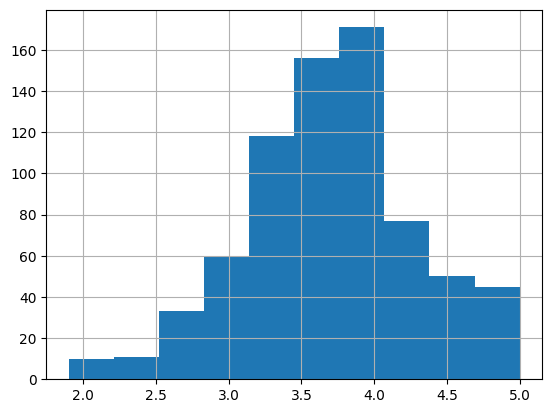

In [17]:
df.Rating.hist()

<AxesSubplot: >

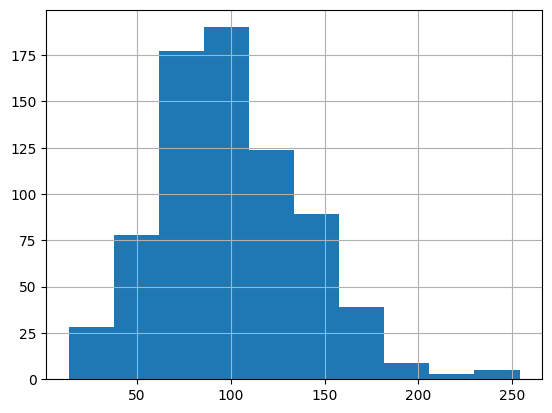

In [18]:
df.avg_salary.hist()

<AxesSubplot: >

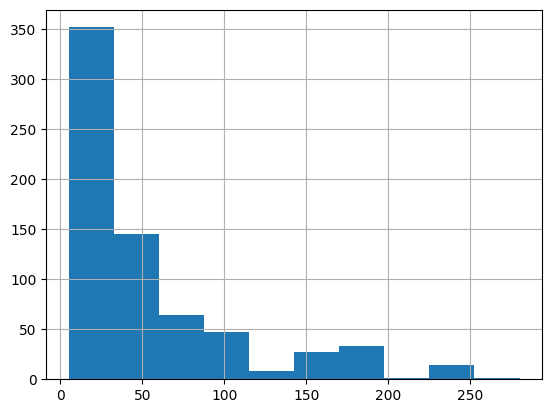

In [19]:
df.Age.hist()

<AxesSubplot: >

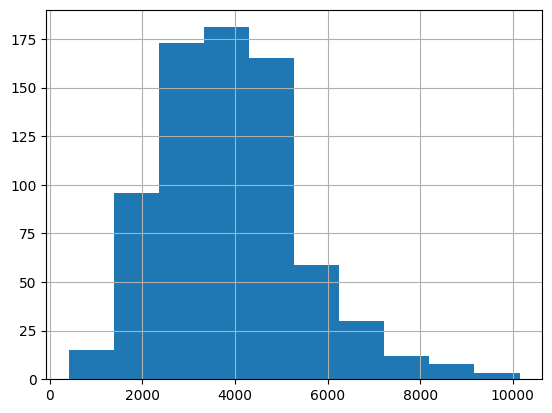

In [20]:
df.desc_len.hist()

<AxesSubplot: >

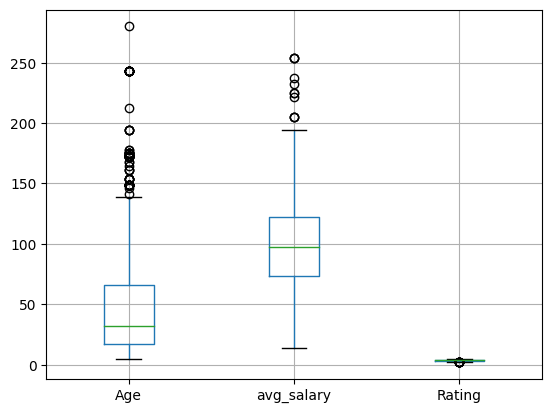

In [21]:
df.boxplot(column = ['Age','avg_salary','Rating'])

<AxesSubplot: >

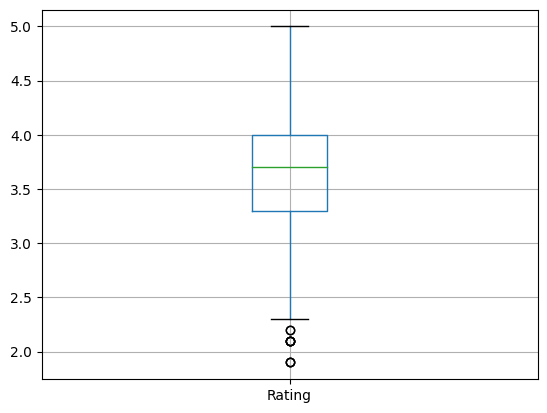

In [22]:
df.boxplot(column = 'Rating')

In [23]:
df[['Age','avg_salary','Rating','desc_len']].corr()

,Age,avg_salary,Rating,desc_len
Age,1.000000,0.023808,-0.108796,0.153659
avg_salary,0.023808,1.000000,0.133678,0.078093
Rating,-0.108796,0.133678,1.000000,-0.082670
desc_len,0.153659,0.078093,-0.082670,1.000000


<AxesSubplot: >

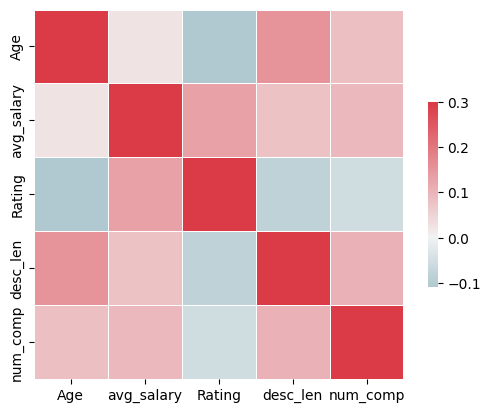

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_Txt', 'Job State','Same State', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority']]

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (200) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


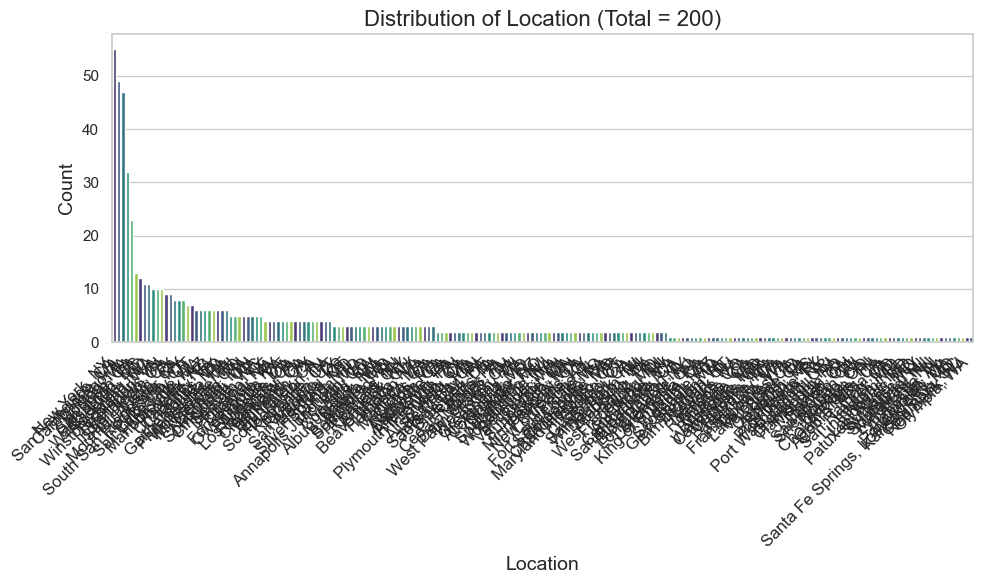

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (197) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


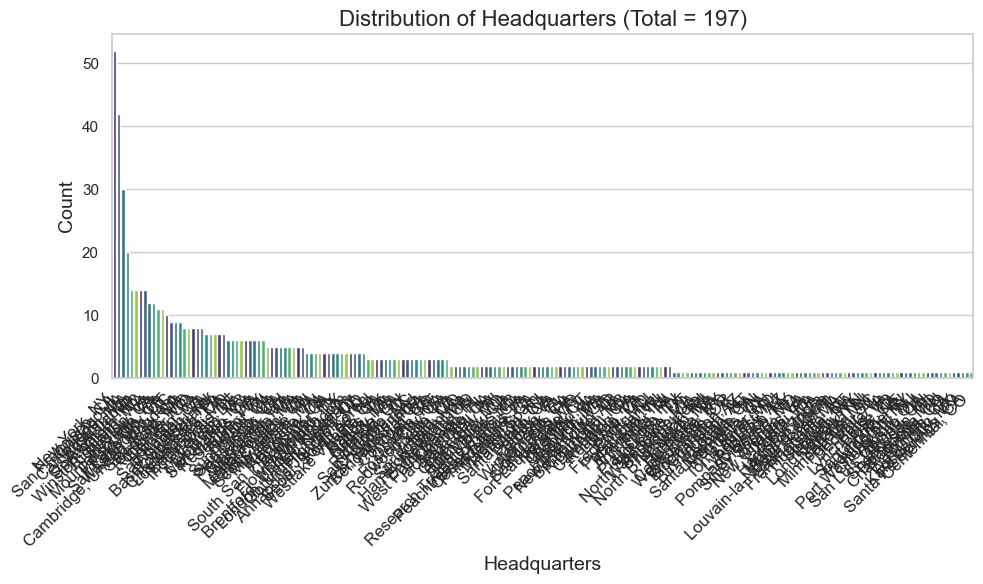

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


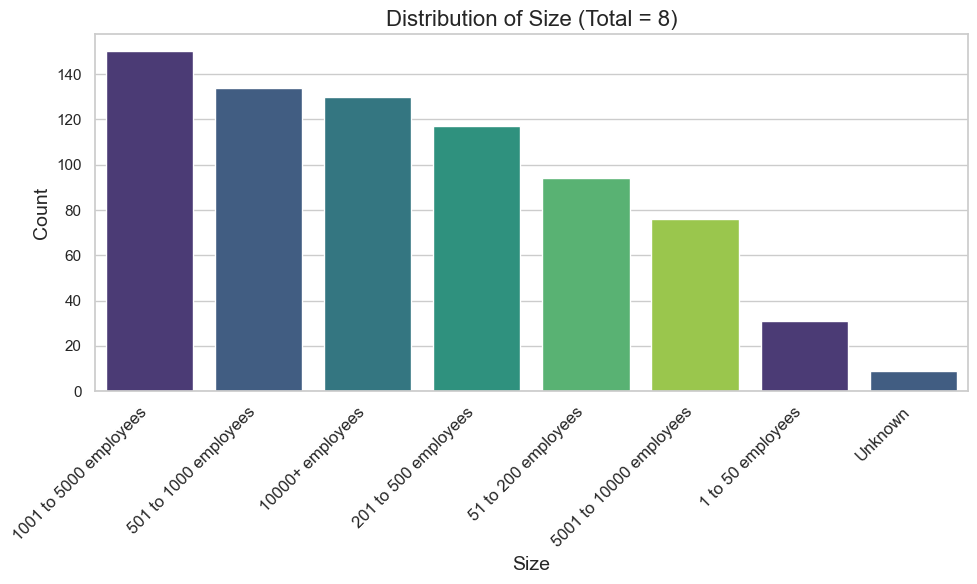

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


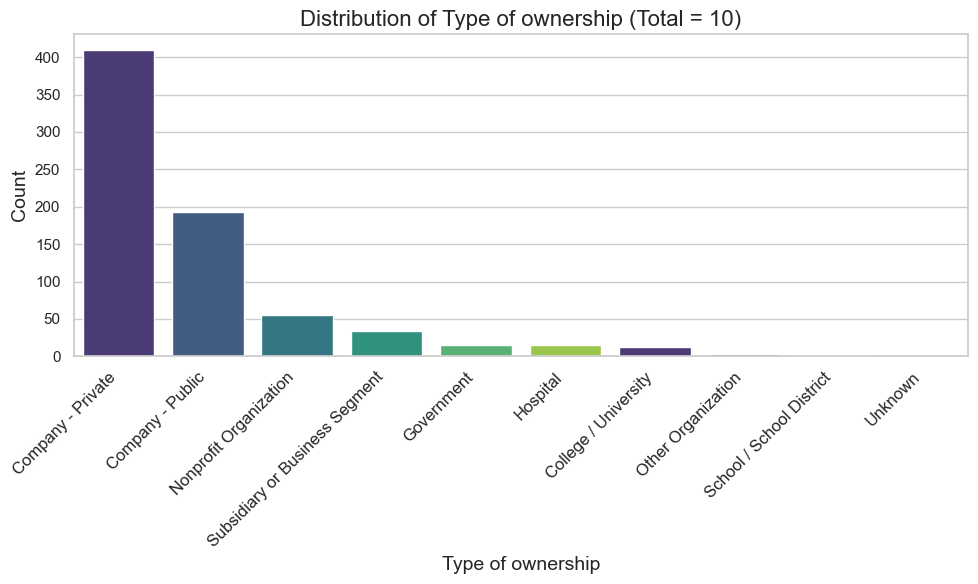

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (59) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


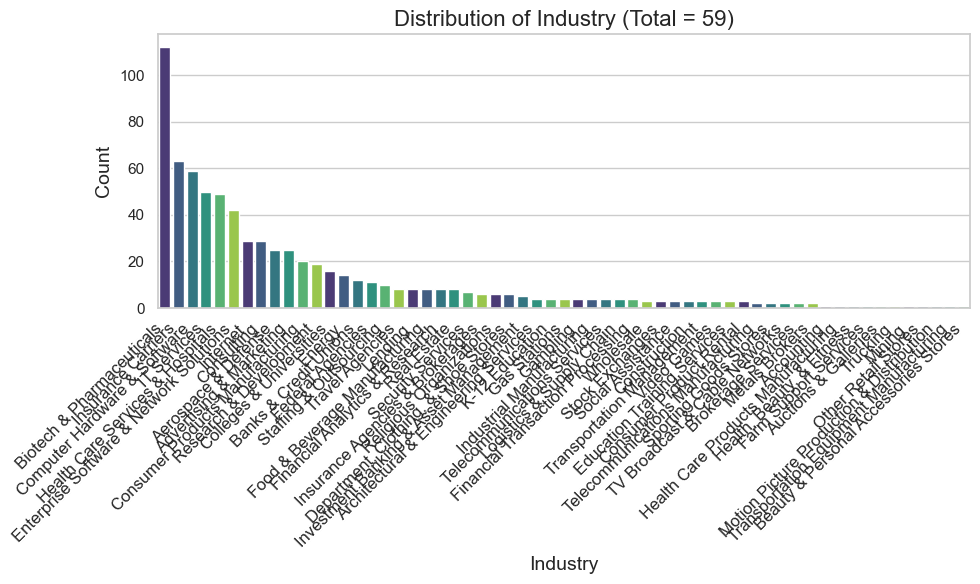

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


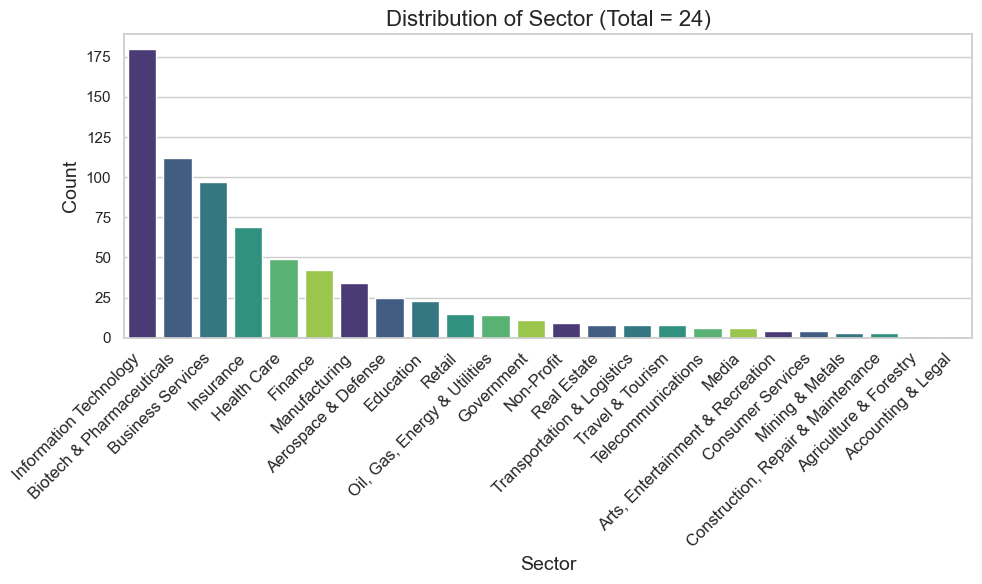

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (13) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


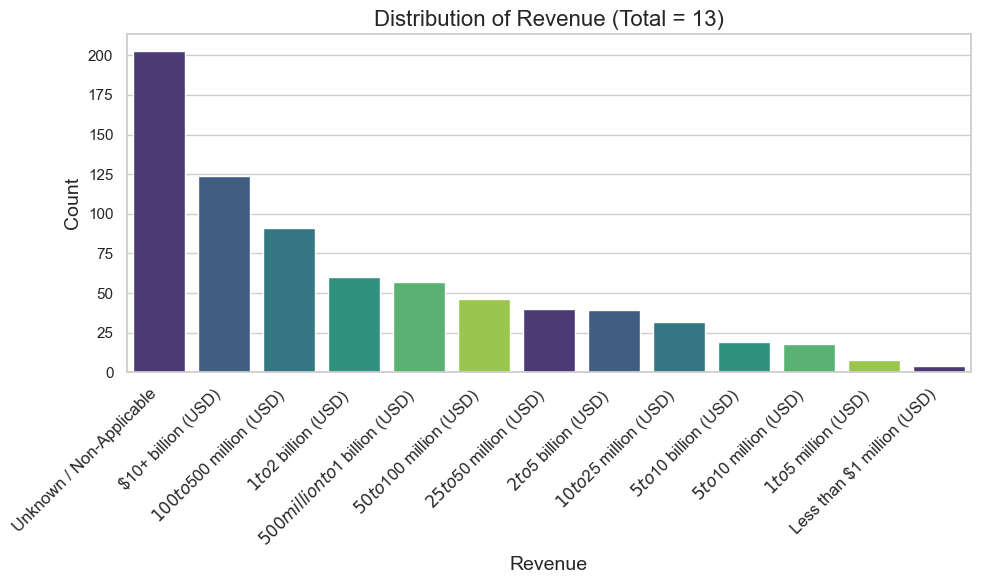

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (343) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels
) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


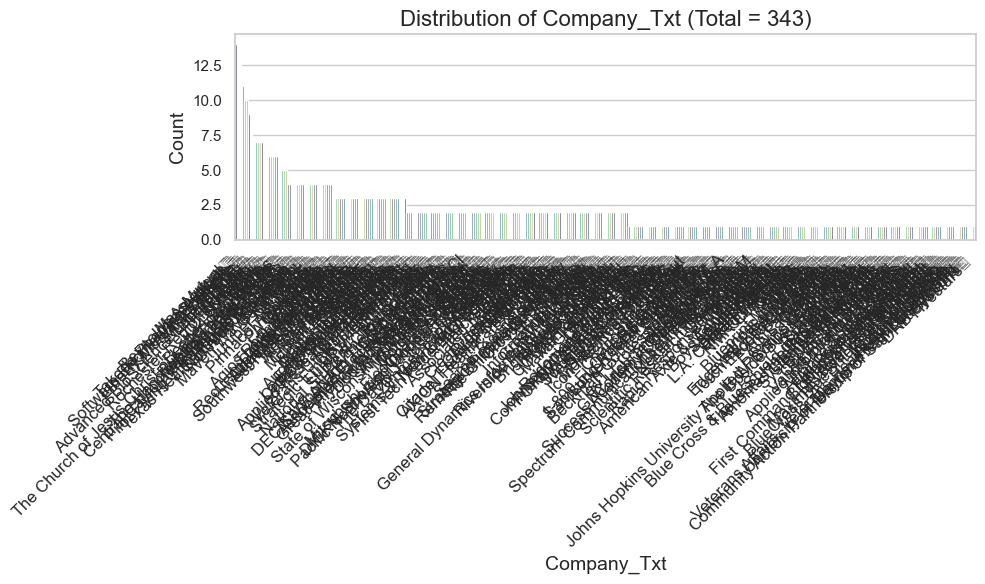

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (37) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


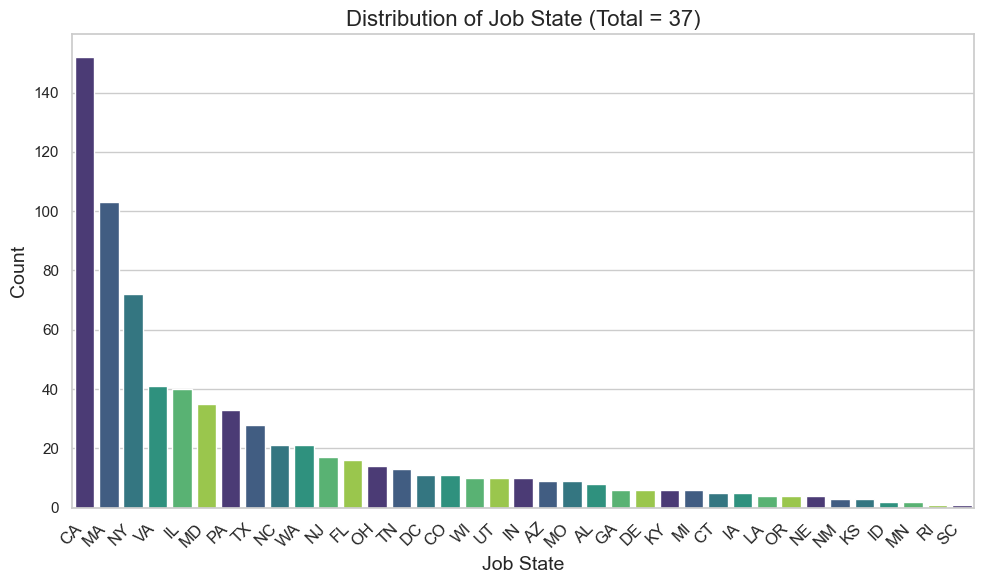

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


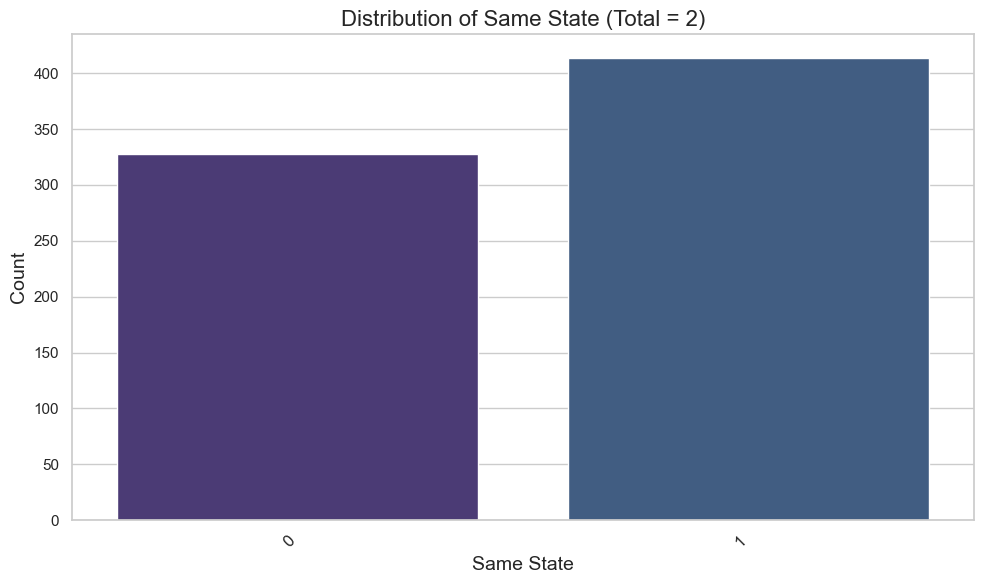

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


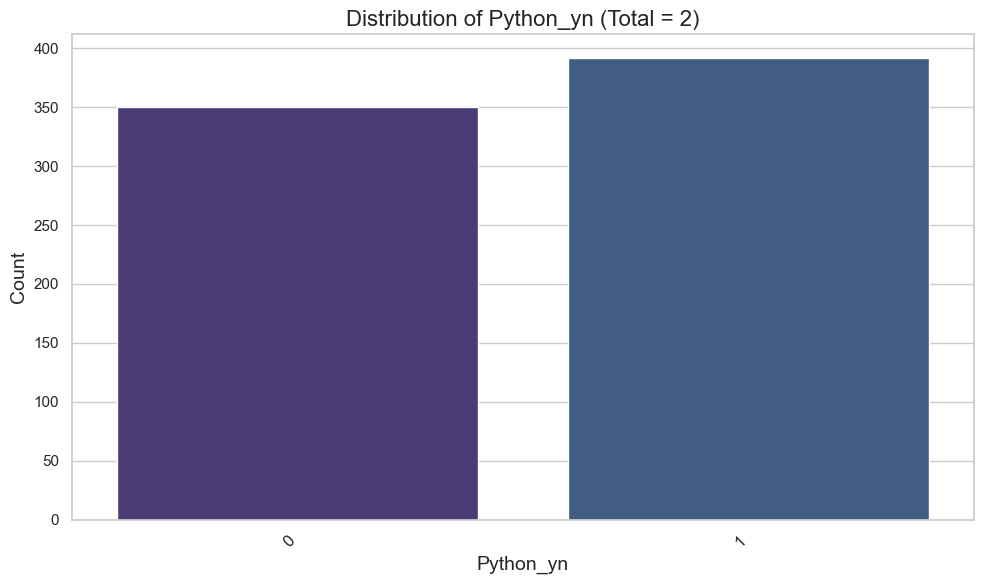

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


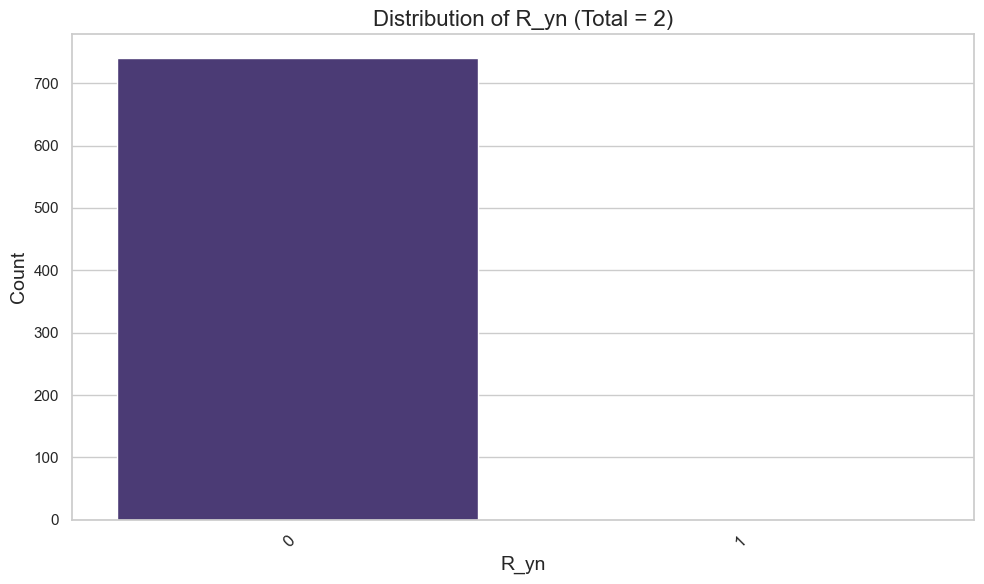

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


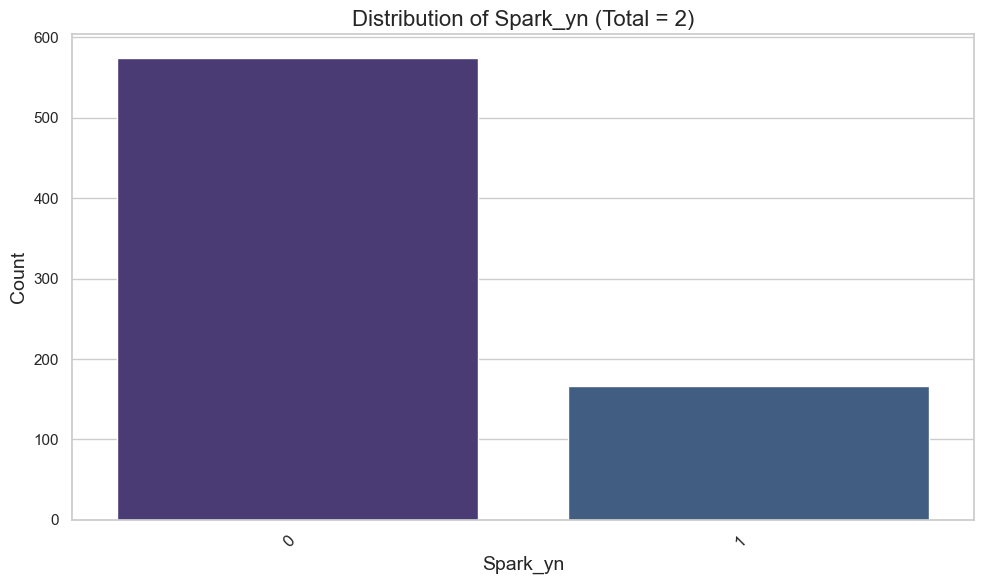

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


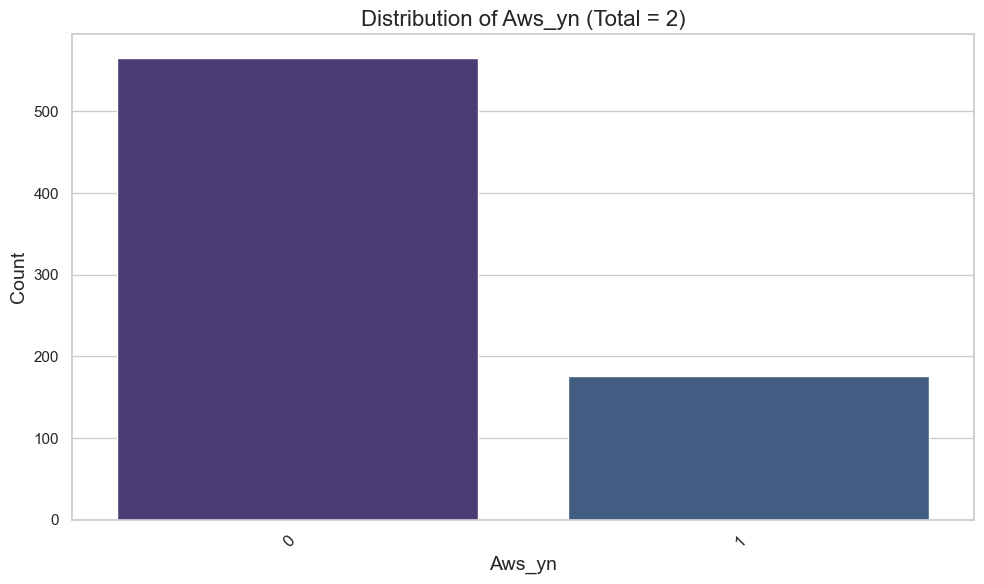

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


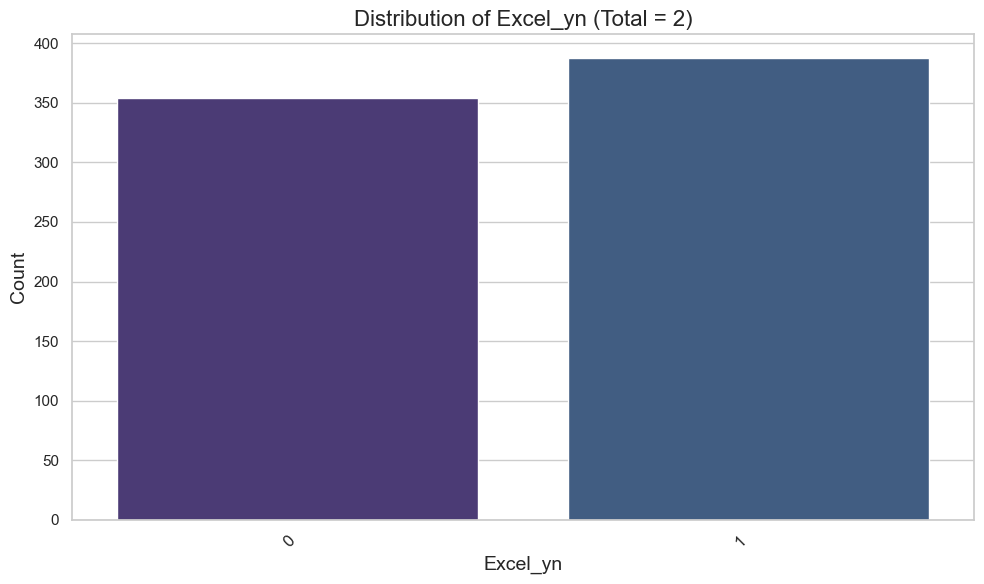

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


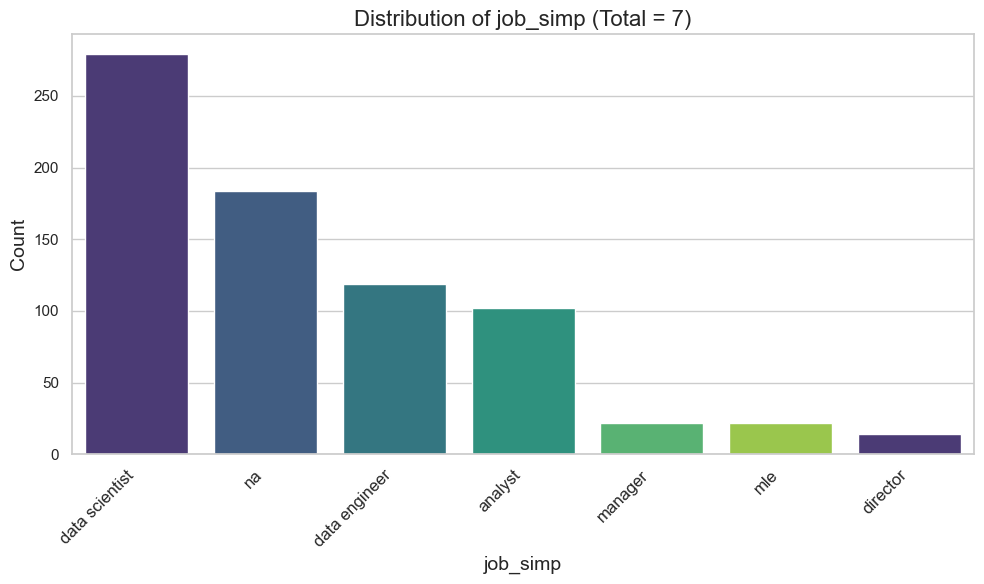

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3800831317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels


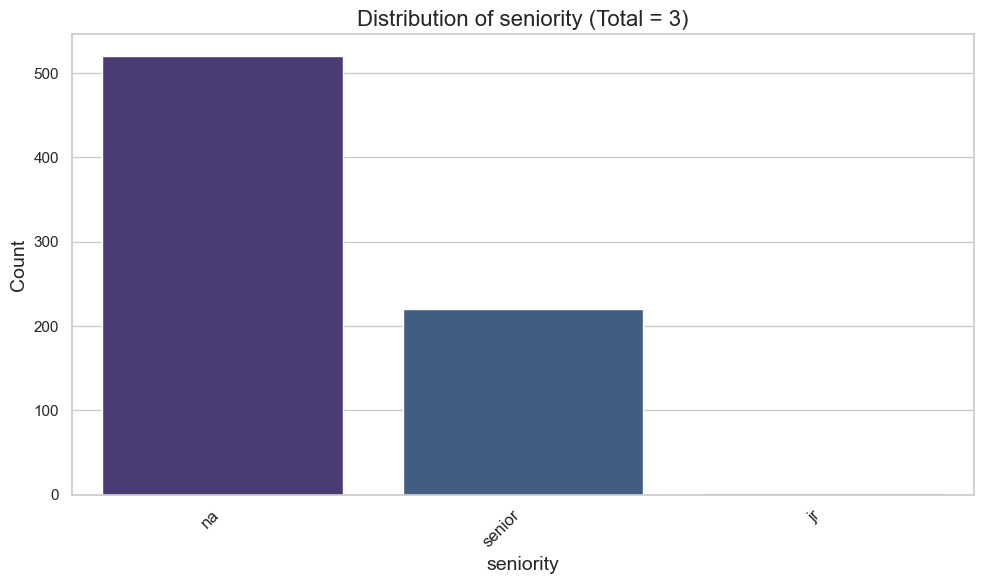

In [26]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis")

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    plt.figure(figsize=(10, 6))  # Increase figure size for clarity
    
    # Plot with custom color palette and settings
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
    chart.set_title(f"Distribution of {i} (Total = {len(cat_num)})", fontsize=16)  # Add a title
    chart.set_xlabel(i, fontsize=14)  # Customize x-axis label
    chart.set_ylabel("Count", fontsize=14)  # Customize y-axis label
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust tick labels
    
    plt.tight_layout()  
    plt.show()

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:8: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)


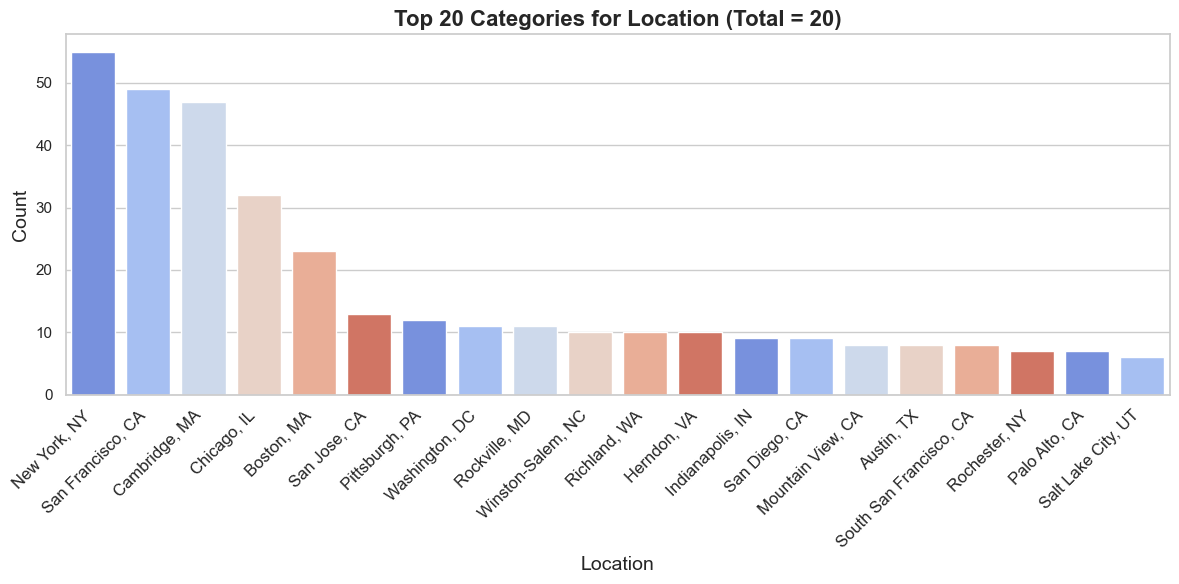

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:8: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)


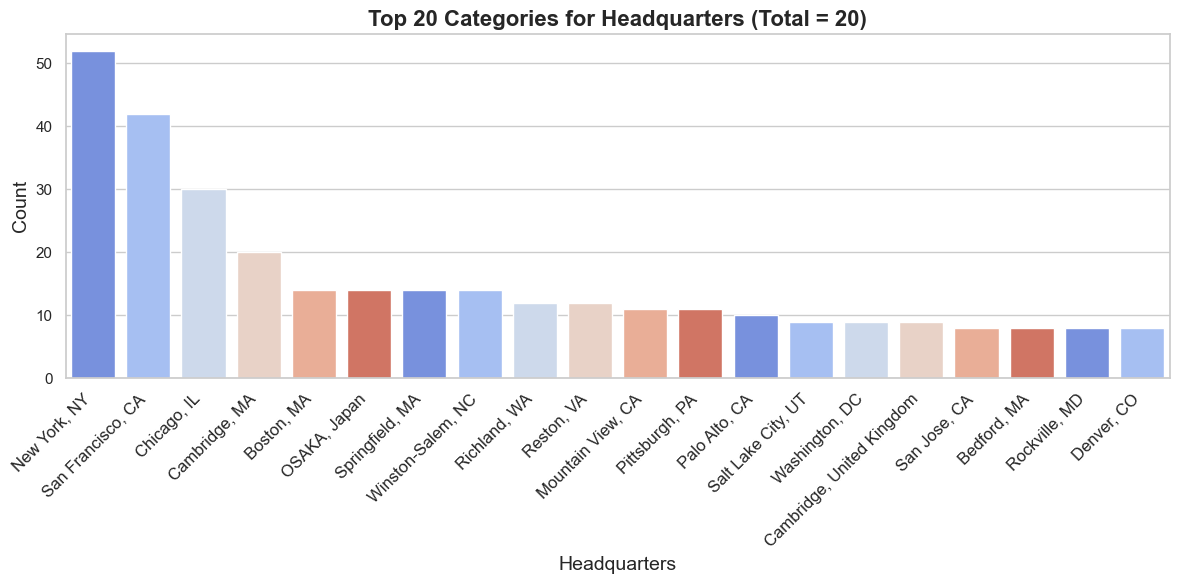

C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:8: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
C:\Users\My Computer\AppData\Local\Temp\ipykernel_2524\3447004671.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12)
) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


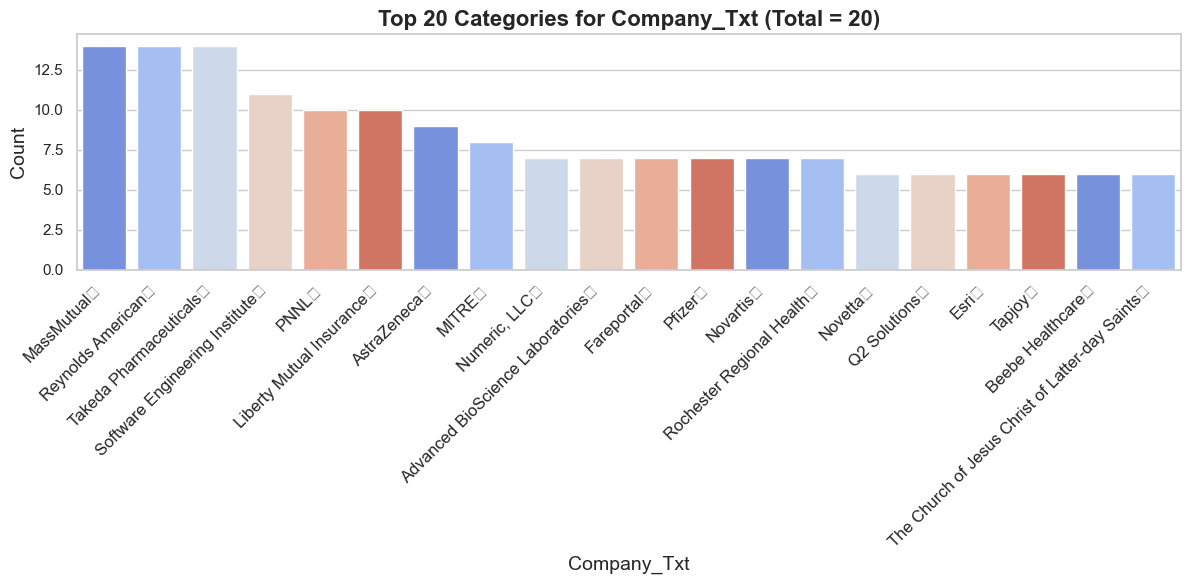

In [27]:
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm") 

for i in df_cat[['Location', 'Headquarters', 'Company_Txt']].columns:
    cat_num = df_cat[i].value_counts()[:20] 
    plt.figure(figsize=(12, 6)) 

    chart = sns.barplot(x=cat_num.index, y=cat_num, palette=palette)
    chart.set_title(f"Top 20 Categories for {i} (Total = {len(cat_num)})", fontsize=16, weight='bold') 
    chart.set_xlabel(i, fontsize=14)  
    chart.set_ylabel("Count", fontsize=14) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right", fontsize=12) 

    plt.tight_layout()
    plt.show()

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Txt', 'Job State', 'Same State', 'Age', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [29]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [30]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [31]:
pd.pivot_table(df, index = ['Job State','job_simp'], values = 'avg_salary').sort_values('Job State', ascending = False)

avg_salary
Job State job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [32]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [33]:
pd.pivot_table(df, index = ['Job State','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('Job State', ascending = False)

avg_salary
Job State job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [34]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Job State', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Job State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Txt', 'Job State', 'Same State', 'Age', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [36]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'Type of ownership','avg_salary']]

In [37]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
5.0     134.700000
2.5     120.000000
4.5     117.714286
4.1     116.368421
3.9     113.071429
2.6     109.083333
4.4     108.606061
3.2     105.500000
4.0     105.340426
3.5     104.897959
3.7     104.131148
4.7     103.983871
4.3     102.468750
3.3     101.858974
4.2     100.442308
2.2      97.750000
4.6      97.250000
3.8      96.811475
2.1      95.900000
3.4      93.011364
1.9      87.500000
3.1      86.580000
3.0      85.588235
3.6      85.467391
2.8      83.928571
2.7      83.250000
2.3      81.500000
2.9      81.138889
4.8      80.277778
2.4      60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Broke

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [38]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python_yn', values = 'avg_salary', aggfunc = 'count')

Python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16,44
$1 to $5 million (USD),1,7
$10 to $25 million (USD),16,16
$10+ billion (USD),66,58
$100 to $500 million (USD),47,44
$2 to $5 billion (USD),17,22
$25 to $50 million (USD),24,16
$5 to $10 billion (USD),9,10
$5 to $10 million (USD),9,9


In [39]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

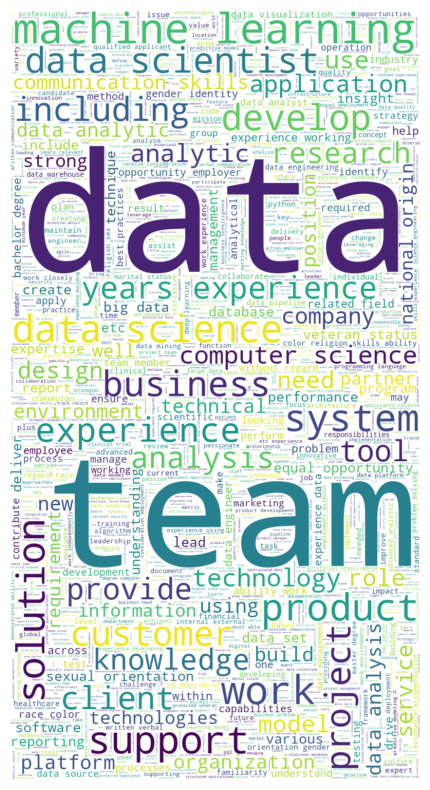

In [41]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
df.to_csv('eda_data.csv')